In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

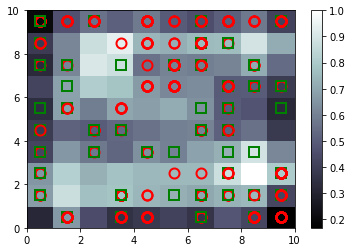

In [2]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [3]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [4]:
frauds

array([[1.5678210e+07, 1.0000000e+00, 4.2170000e+01, 5.0400000e+00,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.2750000e+01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 9.2000000e+01, 1.0000000e+00],
       [1.5716276e+07, 1.0000000e+00, 3.4250000e+01, 3.0000000e+00,
        2.0000000e+00, 1.3000000e+01, 8.0000000e+00, 7.4150000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5770406e+07, 1.0000000e+00, 3.2670000e+01, 9.0000000e+00,
        1.0000000e+00, 9.0000000e+00, 8.0000000e+00, 5.2500000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.5400000e+02, 1.0000000e+00],
       [1.5762392e+07, 1.0000000e+00, 3.6670000e+01, 3.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 9.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

## Now we are using data from SOM to our ANN

In [5]:
# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 3s 5ms/step - loss: 0.1638 - acc: 0.9913
Epoch 2/2
690/690 [==============================] - 3s 5ms/step - loss: 0.0615 - acc: 0.9913


In [11]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [12]:
y_pred

array([[1.56214230e+07, 1.51231885e-03],
       [1.56009750e+07, 2.65502930e-03],
       [1.56430560e+07, 2.79223919e-03],
       ...,
       [1.55809140e+07, 1.09909981e-01],
       [1.56079860e+07, 1.37666106e-01],
       [1.57704060e+07, 1.39868081e-01]])